<figure>
  <IMG SRC="https://www.capgemini.com/nl-nl/wp-content/themes/capgemini-2018-02/assets/images/logo.svg" WIDTH=250 ALIGN="RIGHT"/>
</figure>

# DS Python Workshop 1
*By Alain Issa & Jeroen Dhondt*

### How to use this notebook

 
*   Double click any cell to edit it's content
*   Click  ``` SHIFT+ENTER ```  to execute a 
*  The exercises have a difficulty assigned to them, from * to *** 

### Resources
Official documentation (bit hard to understand) [Link official documentation](https://docs.python.org/3/)

Interactive website where you can quickly look up basic functions of Python: [Python Cheatsheet](https://www.pythoncheatsheet.org/)


#Chapter 1: Introducing Time Series
Time series are a set of data where the values are respresented over time. The index is thus represented as a time or date unit.

Important to start, let the Jupyter notebook know where to look for the data files. Make sure to use double dashes in your path name, eg. C:\\Users\\...

In [1]:
import os
data_folder = "C:\\Users\\jeroe\\PycharmProjects\\untitled\\data"
os.chdir(data_folder)

## Importing the data and cleaning

We begin with reading our new data file "new-year-resolutions.csv", specifying that the seperator character is a comma (,) in the file. Let's see how the data looks like:

In [2]:
import pandas as pd

resolutions = pd.read_csv("new-year-resolutions.csv",sep=",")
print(resolutions.info())
resolutions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB
None


,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


The data here is a relative popularity of search terms on Google (found via Google Trends). The popularity of three keywords were compared over a monthly basis: diet, gym and finance. The presumed expectation of the data is that we will see an increase in popularity of 'diet' and 'gym' around the New Year's period because of people making their good resolutions for the new year. Let's find out together!

With the data loaded, we now reformat our data to have the preferred column names and index. 

PS> Remember, we use inplace=True so the operation on the data set is done directly on the object. With inplace=False (the default value), the operation would create and return a new copy of the data!

In [3]:
resolutions.columns = ["month","diet","gym","finance"]
resolutions.set_index("month", inplace=True)

resolutions.head()

,diet,gym,finance
month,,,
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47
2004-04,70,22,48
2004-05,72,22,43


## Using the DateTimeIndex of Pandas

Much better. However, we still have a problem with our index:

In [4]:
resolutions.index

Index(['2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10',
       ...
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='month', length=168)

The program does not recognize it is a date (see above, dtype='object'). Making the index of the type DateTimeIndex will give us a lot of powerful tools to work with this data. 

A single String object can be transformed to DateTime object with the pd.to_datatime(..). We transform all elements of the index of our data set here.

In [5]:
resolutions.index = pd.to_datetime(resolutions.index)

print(resolutions.index)
resolutions.index[0]


DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='month', length=168, freq=None)


Timestamp('2004-01-01 00:00:00')

So what are the benefits of using a DateTimeIndex? Well, it will allow you to very easily take a subset of your data. For instance to get all data of 2014:

In [6]:
resolutions["2014"]


,diet,gym,finance
month,,,
2014-01-01,61,47,46
2014-02-01,53,44,47
2014-03-01,54,43,47
2014-04-01,53,40,46
2014-05-01,50,39,44
2014-06-01,49,39,44
2014-07-01,48,41,45
2014-08-01,47,40,44
2014-09-01,46,40,48


Or by selecting a range ([start] : [end], including both the starting and end elemlnt). For example, selecting the first 4 months of 2005:

In [7]:
resolutions["2005-01":"2005-04"]

,diet,gym,finance
month,,,
2005-01-01,64,32,44
2005-02-01,54,28,48
2005-03-01,56,27,46
2005-04-01,56,25,44


Finally, let us visualize the data with the build in, default plotter. More advanced visualizations are discussed in a later chapter. 

For now, just remember that the .plot() method will give you a quick graph of your data. 'figsize' helps you select the size of the image. Feel free to adjust it to fit your screensize.

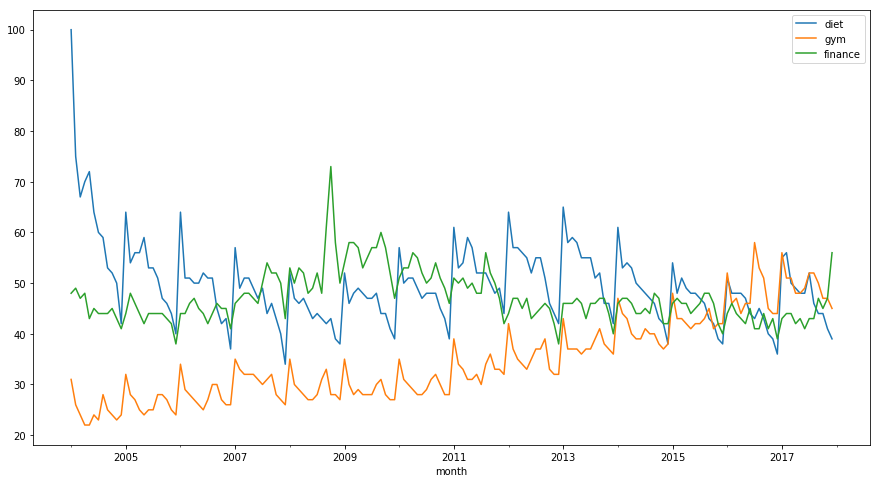

In [86]:
resolutions.plot(figsize=(15,8))

Some interesting recurring patterns can be seen from this: at the beginning of the year, diet & gym become more popular. We also see an upwards trend for gym, and a downwards trend for diet. These findings we will explore further in chapter 2. First, we will make some exercises on another data set:

In [90]:
!pip install pandas_datareader

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
from pandas_datareader import data

# goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')\
# f = data.DataReader('^DJI', 'stooq')
# f = data.DataReader('F', 'iex', start='2014', end='2016')
f = data.DataReader('GOOGL', 'iex', start='2014')
# f = data.DataReader('^DJI', 'stooq')
print(f.info())
f.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1220 entries, 2014-01-02 to 2018-11-02
Data columns (total 5 columns):
open      1220 non-null float64
high      1220 non-null float64
low       1220 non-null float64
close     1220 non-null float64
volume    1220 non-null int64
dtypes: float64(4), int64(1)
memory usage: 57.2+ KB
None


,open,high,low,close,volume
date,,,,,
2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452
2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215


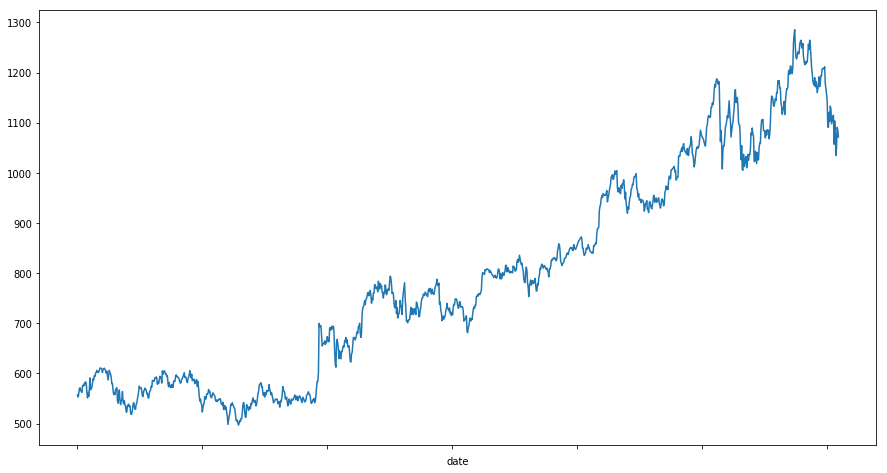

In [81]:
f['close'].plot(figsize=(15,8))

In [13]:
print(type(f.index[0]))
print(f.index[0])
print(type(pd.to_datetime(f.index[0])))
print(pd.to_datetime(f.index[0]))

<class 'str'>
2014-01-02
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-01-02 00:00:00


## Resampling and rolling windows

## Exercise 1.3:

All possible ranges of time can be selected with Pandas, from (nano)seconds to years. A full list can be found here: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases 
And the list of functions to consolidate the data: sum, mean, std, sem, max, min, median, first, last, ohlc or you can write a custom function yourself.

We will chose first to resample quarterly (Q), using the mean to consolidate:

# Chapter 2: Finding trends, correlations and outliers in the data

## Resampling

The first technique that we will tackle in this chapter are resampling. Resampling simply means converting your data to a different time interval. For instance, like we will see in the following example, from monthly data to quarter (4 months) data. Different techniques to consolidate the data exist, including taking the average of the points or taking the first element of the series.

Resampling allows to smoothen your data and make trends more clear and can also help with removing the impact of seasonal trends. 

Let's revisit our "resolutions" data frame: 

In [44]:
resolutions.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


All possible ranges of time can be selected with Pandas, from (nano)seconds to years. A full list can be found here: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases 
And the list of functions to consolidate the data: sum, mean, std, sem, max, min, median, first, last, ohlc or you can write a custom function yourself.

We will chose first to resample quarterly (Q), using the mean to consolidate:

In [43]:
quarterly_mean = resolutions.resample('Q').mean()
quarterly_mean.head()

,diet,gym,finance
month,,,
2004-03-31,80.666667,27.000000,48.000000
2004-06-30,68.666667,22.666667,45.333333
2004-09-30,57.333333,25.333333,44.000000
2004-12-31,48.000000,23.666667,43.000000
2005-03-31,58.000000,29.000000,46.000000


Or taking the first value for 2-year intervals can be done as follows:

In [46]:
resolutions.resample('2Y').first().head()

,diet,gym,finance
month,,,
2004-12-31,100,31,48
2006-12-31,64,32,44
2008-12-31,57,35,46
2010-12-31,52,35,54
2012-12-31,61,39,51


The interval doesn't necessarily have to become larger though, one can also resample for instance from weekly to daily data. In those cases, a technique to fill in the unknown values ('padding') is chosen. We will not go in further detail here though.

## Finding a trend with a rolling window
The next important technique is rolling windows. Rolling windows use a similar technique of merging values over a larger time range. However they recalculate the value at each spot instead of consolidating the data. This is particularly useful for removing seasonal trends.

In [97]:
resolutions_rolling = resolutions.rolling(12).mean()
resolutions_rolling.tail()

,diet,gym,finance
month,,,
2017-08-01,46.833333,49.250000,42.500000
2017-09-01,46.916667,49.166667,42.750000
2017-10-01,47.250000,49.333333,43.083333
2017-11-01,47.416667,49.583333,43.416667
2017-12-01,47.666667,49.666667,44.833333


Let's visually check if this had the wanted effect. We need to perform a join on the data of our original data frame, with the newly created one 'resolutions_rolling'

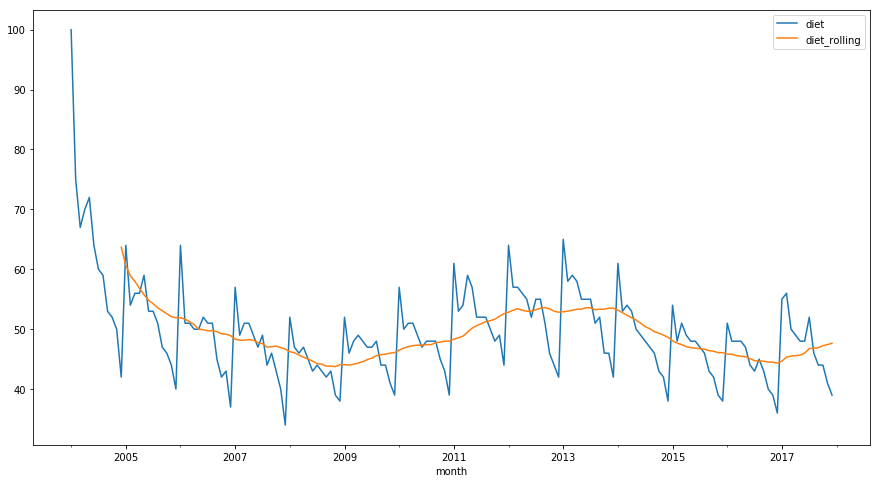

In [105]:
resolutions_joined = resolutions.join(resolutions_rolling, rsuffix='_rolling') #suffix is added to the name of columns that are found in both dataframes to avoid names clashing

# focus only on diet
diet = resolutions_joined[['diet','diet_rolling']]
diet.plot(figsize=(15,8))

The rolling average of 12 months is indeed is a good representation of the underlying trend, removing the seasonal effect.

Note that any other value for the rolling average (including higher values!) will not give such a nice effect. Try it yourself if you are curious..

## Seasonal effects

So how to study the seasonal swing? We pose a simple assumption: the data we found is simply the sum of the seasonal effect on top of a general trend.

data = trend + seasonal -> seasonal = data - trend
Let's find out if this is a good assumption.

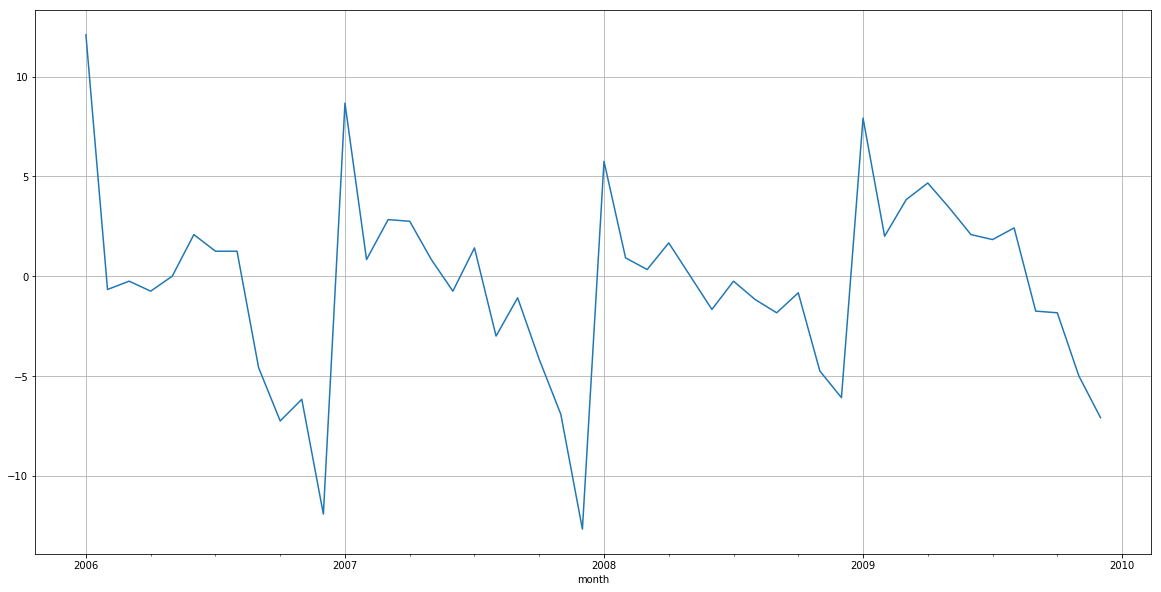

In [152]:
seasonal_diet = diet['diet'] - diet['diet_rolling']

# let's zoom into the period 2006-2009 to make it clearer
seasonal_diet['2006':'2009'].plot(figsize=(20,10),grid=True)

## Exercise 2.1:

## Exercise 2.2:

## The Correlation Coefficient

The correlation coefficient can measure the correlation (= do they have a similar shape) between two data series. The coefficient ranges from -1 to 1, where 1 shows perfect correlation, 0 no correlation and -1 a reverse correlation.

We can visualize our data once more. Try to already guess what correlation coefficients you expect to get between the 3 data series.


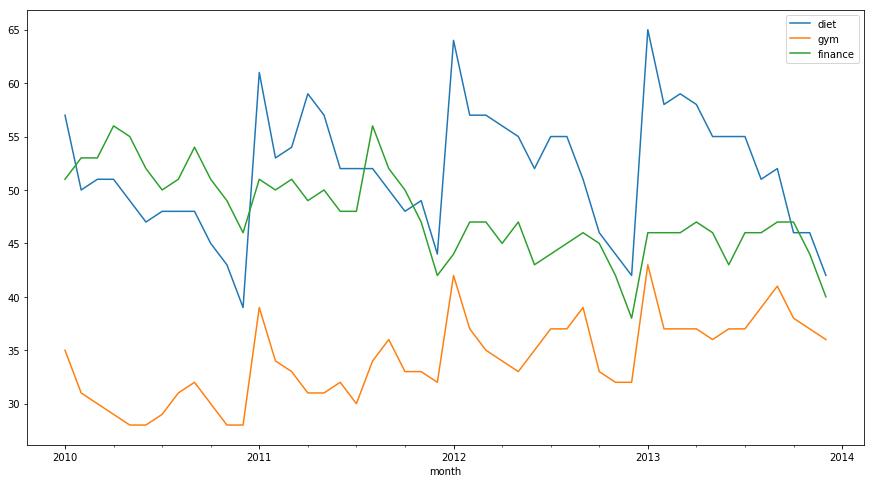

In [134]:
resolutions['2010':'2013'].plot(figsize=(15,8))

From above plot, I would say the orange('gym') and blue ('diet') show a similar shape, raising and dropping at the same points. The green line seems not to follow this shape though.

We can now calculate the actual correlation values. With Pandas, this is extremely easy. Let's see if the values match our expectations:

In [136]:
resolutions['2010':'2013'].corr()

,diet,gym,finance
diet,1.000000,0.570592,0.080103
gym,0.570592,1.000000,-0.410036
finance,0.080103,-0.410036,1.000000


That's close to what we expected, but we had to zoom in to the period 2010-2013. If we take the whole data series, we will find a very strange result:

In [143]:
resolutions.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Diet and gym have a close to zero, and even negative correlation! That can be explained from our assumption before: the data is actual the sum of the seasonal fluctuation on top of the general trends. And the general trends of diet and gym are actually quite opposite (apart from the 2010-2013 period), as can be seen when we plot their rolling averages.

,diet_rolling,gym_rolling
diet_rolling,1.000000,-0.298725
gym_rolling,-0.298725,1.000000


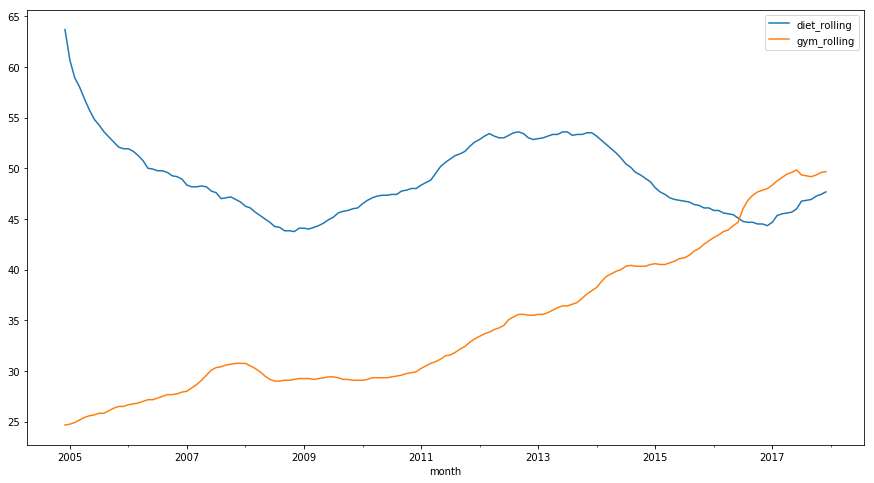

In [150]:
resolutions_joined[['diet_rolling','gym_rolling']].plot(figsize=(15,8))
resolutions_joined[['diet_rolling','gym_rolling']].corr()

And the negative correlation of -0.29 also shows this.

Your next exercise will be to prove that the seasonal effect is actually positively correlated for diet and gym!

## Exercise 2.3: Correlation of the seasonal patterns in the New Years Resolutions

- We calculated the seasonal effect on 'diet' before. Start by calculating the seasonal effect on 'gym' in the same matter and then join the data.
- Visualize the 2 seasonal effects together. Does our assumption hold that they are strongly correlated?
- Calculate the correlation to validate

# Chapter 3: Data Visualisation 

To visualize data you have two possibilites:

1) take a look at the data in raw format ... but not really useful and helpful 

2) Plot them in a chart 

=> e.g. Bubble Chart and Violin Box plot

### Violin Boxplot 

The Violin Boxplot is used as an error metric. It shows the distribution around the mean which mean that it shows if the data are homogenous (look the same) or heterogenous (looks different)

In order to create a box plot with Pandas you can use the following code:


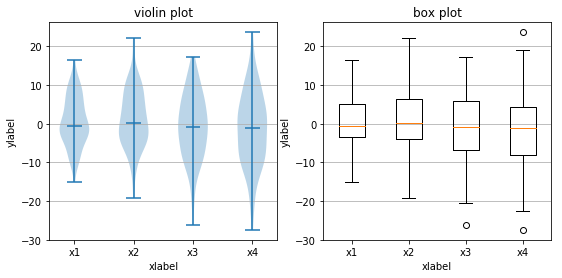

In [12]:

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]
# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

### Bubble chart
the bubble chart are useful to have three information at the same time (even four with the colors)

<figure>
  <IMG SRC="http://static.klipfolio.com/images/saas/example_bubblechart.png" WIDTH=600 ALIGN="CENTER"/>
</figure>


In this figure we can see the time spent on the TV by the male/female as well as the porportion (how many of them) 

It is also useful for detecting outlier because if we have one point really far from the other with a small diameter, it means that there are a few points (or maybe only one data) that corresponds to this point.

In order to create a bubble chart we can use the following code

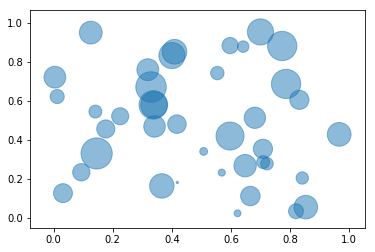

In [32]:
import matplotlib.pyplot as plt
import numpy as np
 
# create data
#BE CAREFUL! all the data have to be of the same length
x = np.random.rand(40) #data for the first axis
y = np.random.rand(40) #data for the second axis
z = np.random.rand(40) #data for the third axis
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()


## Exercice X.1 (*)

Import your data (todo: add file) using pandas and 

## Exercice X.2 (*)

## Exercice X.3 (**)

## Exercice X.4 (***)

# Chapter X: Linear Regression

Linear regression is an algorithm that tries to find a line that will modelize the data
It does it by finding the line that will minimizing the square residual error (=distance between the points and the corresponding point in the line = the estimated value) for all the points


In order to build a linear regression model you will need 

1) A dataset

2) To know which column of your dataset you will use (e.g. the time and the temperature for exemple)  

3) give your data to the algorithm to make the job 

Example:

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


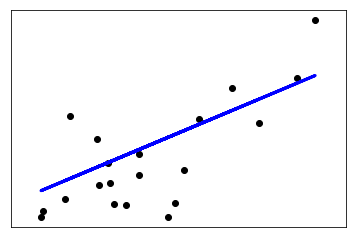

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercice X.1 (*)
Import your data and do a linear regression on (todo)

## Exercice X.2 (**)
- Based on the previous exercices try to predict a future point



## Exercice X.3 (**)
- Compute the average error 

